## Deterministic 

SIR models stand for susceptible, infected, and recovered models. 
SIR stands for . 

Models are based on the following differential equations.

$\quad$

### Susceptible Population 
Defined by $S$, is the population that can be infected. 
It is modelled with the following differential equation: 

$ \frac{ \partial S}{\partial t} = -\rho S I $

What this means is, there is an infected population $I$ which transmits or infects the population $S$, if $\rho$ is equal to $1$ then it means for every infected person, they infect a new person, which means the susceptible population decreases by 1. 

$ \rho$ is called the transmission rate or infection rate. 

### Infected Population 
Defined by $I$, and is the population of infected indivudals. It is modelled with the following differential equation: 


$ \frac{ \partial I}{\partial t} = \rho S I - \gamma I $

What $\gamma$ is, is the recovery rate. 



### Recovered Population
Defined by $R$, and is modelled with 

$ \frac{\partial R}{\partial t} = \gamma I$



### Summary 

The total population is $S + I + R $, you will notice that the change in population is 

$$ \frac{\partial S}{\partial t} + \frac{\partial I}{\partial t} + \frac{\partial R}{\partial t} = 0$$ 

In [70]:
import numpy as np 

In [110]:
# the first thing we are going to do , 
# we are going to create a linear space in time with 1000 steps. 

def create_t():
    return(np.linspace(0,100,1000))

In [111]:
t = create_t()

In [112]:
# we are going to start our populations as the following 

S = np.array([499375])
I = np.array([625])
R = np.array([0])



In [113]:
# lets calculate our h value 
h = t[1] - t[0]

In [114]:
# write our differential equations 
def dS_dt(rho,S_i,I_i):
    return(-rho*S_i*I_i)

def dI_dt(rho,gamma,S_i,I_i):
    return(rho*S_i*I_i - gamma*I_i)

def dR_dt(gamma,I_i):
    return(gamma*I_i)

In [115]:
# now we need to code up our euler's method 
rho = 0.001
gamma = 1


for i in range(0,len(t)):
        # old values
        S_now = S[i]
        I_now = I[i]
        R_now = R[i]
        # new values
        print(S_now,I_now,R_now)
        S_new = S_now + h*dS_dt(rho,S_now,I_now)
        I_new = I_now + h*dI_dt(rho,gamma,S_now,I_now)
        R_new = R_now + h*dR_dt(gamma,I_now)
        
        if S_new < 1:
            S_new = 0.0
        if I_new < 1:
            I_new = 0.0
        # append values 
        S = np.append(S,S_new)
        I = np.append(I,I_new)
        R = np.append(R,R_new)
        if I_new < 1:
            break 
        

499375 625 0
468132.8203203203 31804.61711711712 62.56256256256257
0.0 1518989.8516643501 3246.2079196313434
0.0 1366938.8154617124 155297.244122269
0.0 1230108.1032032827 292127.9563806987
0.0 1106974.1589386899 415261.90064529155
0.0 996165.9348207029 526070.1247632785
0.0 896449.6250288407 625786.4345551407
0.0 806714.9278287566 715521.1317552249
0.0 725962.682800853 796273.3767831285
0.0 653293.7455835504 868942.3140004311
0.0 587898.9762558677 934337.0833281138
0.0 529050.229883909 993185.8297000725
0.0 476092.2489145487 1046143.8106694327
0.0 428435.3671413206 1093800.692442661
0.0 385548.94400405127 1136687.1155799301
0.0 346955.4561157579 1175280.6034682235
0.0 312225.18022829463 1210010.8793556867
0.0 280971.4084336705 1241264.6511503109
0.0 252846.142324194 1269389.9172597874
0.0 227536.218167618 1294699.8414163634
0.0 204759.81995264124 1317476.2396313401
0.0 184263.34147890337 1337972.718105078
0.0 165818.56255208622 1356417.4970318952
0.0 149220.1078421677 1373015.95174181

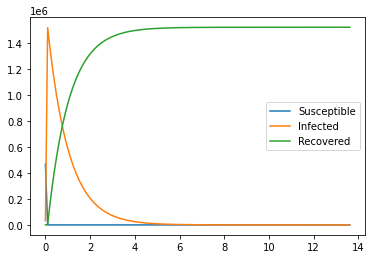

In [116]:
# we are going to plot this stuff 

import matplotlib.pyplot as pyplot 


pyplot.plot(t[0:(len(S)-1)],S[1:], label = "Susceptible")
pyplot.plot(t[0:(len(S)-1)],I[1:], label = "Infected")
pyplot.plot(t[0:(len(S)-1)],R[1:], label = "Recovered")
pyplot.legend()



In [143]:
def SIR_model(S_start,I_start,rho,gamma,num_steps):
    # linear space
    t = np.linspace(0,100,num_steps)
    
    # now we need to code up our euler's method 

    # lets calculate our h value 
    h = t[1] - t[0]
    
    S = np.array([S_start])
    I = np.array([I_start])
    R = np.array([0])

    for i in range(0,len(t)):
            # old values
            S_now = S[i]
            I_now = I[i]
            R_now = R[i]
            # new values
            S_new = S_now + h*dS_dt(rho,S_now,I_now)
            I_new = I_now + h*dI_dt(rho,gamma,S_now,I_now)
            R_new = R_now + h*dR_dt(gamma,I_now)

            if S_new < 1:
                S_new = 0.0
            if I_new < 1:
                I_new = 0.0
            # append values 
            S = np.append(S,S_new)
            I = np.append(I,I_new)
            R = np.append(R,R_new)
            if I_new < 1:
                break 

    # we are going to plot this stuff 

    import matplotlib.pyplot as pyplot 


    pyplot.plot(t[0:(len(S)-1)],S[1:], label = "Susceptible")
    pyplot.plot(t[0:(len(S)-1)],I[1:], label = "Infected")
    pyplot.plot(t[0:(len(S)-1)],R[1:], label = "Recovered")
    pyplot.plot(t[0:(len(S)-1)],[100]*(len(S)-1) ,label = 'Hospital Capacity')
    pyplot.legend()



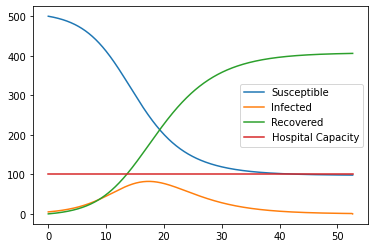

In [144]:
SIR_model(S_start = 500,I_start =5, rho = 0.001,gamma = 0.25,num_steps = 1000)

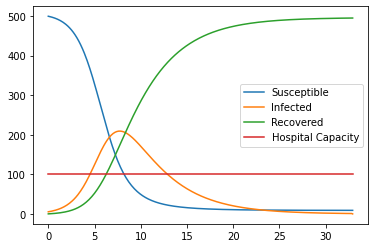

In [145]:
SIR_model(S_start = 500,I_start =5, rho = 0.002,gamma = 0.25,num_steps = 1000)

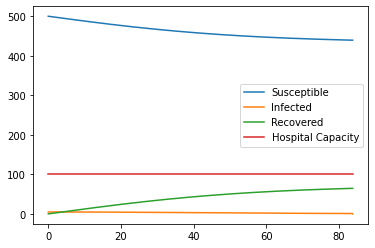

In [147]:
SIR_model(S_start = 500,I_start =5, rho = 0.0005,gamma = 0.25,num_steps = 1000)

## Probabilistic

These types of models are based on random variables, and are considered to be more robust than deterministic approaches. 

Robust meaning, we can give confidence intervals by simulating worse case scenarios! 

Consider a Markov Model. For this model we have situations, behaviours, or characteristics defined as "states". 

Consider the following diagram:

<img src=https://images.squarespace-cdn.com/content/v1/58cde3fcdb29d633eb688e9e/1521154642263-0J0D1SCPP78DUCRH2PQK/ke17ZwdGBToddI8pDm48kIqVzu1nvFhKRkWjdBjCCfpZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpxzNoxjmig5EwpYJ7qI-fYh2QPhSSOzpz7Om7a_An_gZKJd_4gk7NkQ33ar64b108A/Figure+1a.png>

Each state in this case is a sense of being, that is a patient can be healthy, sick, or dead. 

Naturally, a patient can transition between each state, therefore we impose a transition probability. Each of these arrows represent in essence, a transition probability. 

The transition probability signifies that probability that a person will transition from state to state, naturally, a patient can remain in a state, and never leave it. 

Lets use this example in the diagram and introduce some notation. 


Let $H$ be a state of healthy person. 

Let $S$ be a state of a sick Person. 

Let $D$ be a state of a dead person.


Furthermore, let

$P(H|H)$ be the probability of moving to state $H$ if you start in $H$.

$P(S|H)$ be the probability of moving to state $S$ if you start in $H$. 

$P(D|H)$ be the probability of moving to state $D$ if you start in $H$. 

We can define similar probabilities for all other starting states like $P(H|S)$ , $P(S|D)$ and so on. All in all there are a total of 9 probabilities. 

To shorten the notation I will use $p_{HS} = P(S|H)$, this means I start in state $H$ and move to state $S$ with a probability of $p_{HS}$. 

These probabilities have to be coherent. As in, they to sum to 1, and must be greater than or equal to 0. 

Okay so what actually sums up to one? 

All probabilities with their respective starting states. 

So for instance. 

$$ p_{HH}+ p_{HS} + p_{HD} = 1 $$

Note that it doesnt make sense to collectively add all probabilities, only the ones with the same starting states. 

Now we have to store all of this information some how. So we are going to use a dictionary with the following keys. 



In [2]:
{
    "id_patient": "d3k013d0fkglfdbbbmbmm33410", # some random alphanumeric sequence of size 26., str type
    "state":"H", # a string denoting state, as in "H" for healthy, "S" for sick, and "D" for dead. 
}

{'id_patient': 'd3k013d0fkglfdbbbmbmm33410', 'state': 'H'}

In [3]:
# this will be a dictionary for patients. 

In [4]:
# next, I am going to define a transition dictionary, its keys will result in probabilities for transitioning 
p_HS = 0.5; p_HD = 0.0; p_HH = 0.5; 
p_SS = 0.5; p_SD = 0.5; p_SH = 0.0; 
p_DS = 0.0; p_DD = 1.0; p_DH = 0.0; 

# notice how I have a dictionary, with each key equal to dictionary. notice how I have named my variables and keys.
# each of naming conventions is consistent with the mathematical notation! 
p = {
    "H":{"S":p_HS,"D":p_HD,"H":p_HH},
    "S":{"S":p_SS,"D":p_SD,"H":p_SH},
    "D":{"S":p_DS,"D":p_DD,"H":p_DH}
}


In [6]:
# now watch, I can refer to the transition probability from healthy to sick as so:
p["H"]["S"]

0.5

This allows `p["H"]["S"]`, to be consistent with the mathematical notation $p_{HS}$.

In [7]:
# im going to write a function to generate patients with random ids, and a healthy state. 
import numpy as np 
import numpy.random as random
from functools import reduce
import operator

In [8]:
def gen_patients(n=100):
    alpha_numeric = "abcdefghijklmnopqrstuvwxyz0123456789"
    pat_list = []
    for j in range(0,n):
        id_patient = "".join([ alpha_numeric[i] for i in random.randint(low = 0, high = len(alpha_numeric),size = 26)])
        p_state = "H"
        pat_list += [{
            "id_patient":id_patient,
            "state":p_state
        }]
    return(pat_list)

In [9]:
some_patients = gen_patients(n=10)

In [12]:
some_patients

[{'id_patient': 'wnc8n2qttcqw2wepk64ouh4qal', 'state': 'H'},
 {'id_patient': 'xlu4nsu1xephzue3w97fxzydwu', 'state': 'H'},
 {'id_patient': 'uabi7hlofops8sf3m0g0eqoxty', 'state': 'H'},
 {'id_patient': '2wixt4n3uixcveiettc6l0yyhc', 'state': 'H'},
 {'id_patient': 'vpyvgkq2ngmogmqw1xq4xk8g7v', 'state': 'H'},
 {'id_patient': 'uj97vg2twccd3pbnukagn92ze3', 'state': 'H'},
 {'id_patient': '0z7zbrv41hxqz42poakw2nl3lk', 'state': 'H'},
 {'id_patient': '827pbmlymyoqr0zw4swv0h5uh0', 'state': 'H'},
 {'id_patient': '82o4xca9mow6q4cjmos6taeq9i', 'state': 'H'},
 {'id_patient': 'dugrvbbvuphor37to2940qbyc0', 'state': 'H'}]

In [13]:
def calculate_transition(p_state_in,p_draw):
    """Calculates the transition state for the draw"""
    # there are only three states, so we need to take the interval (0,1) and map it to S, H, or D
    if (0 <=  p_draw < p_state_in["H"]):
        return("H")
    elif (p_state_in["H"] <= p_draw < (p_state_in["H"] + p_state_in["S"])):
        return("S")
    elif ((p_state_in["H"] + p_state_in["S"]) <= p_draw < 1):
        return("D")

In [14]:
# 

#  [ ......   Healthy ..... some number .....  Sick    ............    1 ]
 
#  [0  ...............   0.5    ...........1]




# 

In [21]:
p_draw = 0.51
p_state = p["H"]

In [22]:
calculate_transition(p_state,p_draw)

'S'

In [23]:
def transition(pat_list,p_in):
    """Using the transition probabilities in p_in, take the entire patient list, 
    and randomely transition them into different states based on uniform draws between 0,1,
    this function returns nothing"""
    
    # first draw random numbers between 0,1 based on the length of the list 
    r_s = random.uniform(0,1,len(pat_list))

    # then we will loop through each of the patients and calculate which state they have transitioned through 
    for i in range(0,len(pat_list)):
        patient = pat_list[i]
        state = patient["state"]
        p_draw = r_s[i]
        ## use the function previous function we just defined, to get the new state 
        p_state = p_in[state]
        new_state = calculate_transition(p_state,p_draw)
        # change the patients state. 
        pat_list[i]["state"] = new_state


In [40]:
some_patients = gen_patients(n=10)
some_patients

[{'id_patient': 'hssm5fz4lw30qudlkegc5nd0s5', 'state': 'H'},
 {'id_patient': '2opztrsbizm93iv7t2tihyonfk', 'state': 'H'},
 {'id_patient': 'hez4wiz508jof8djvjmthqoxve', 'state': 'H'},
 {'id_patient': '19jmh4jaqanh56l0j3lt800s3k', 'state': 'H'},
 {'id_patient': 'wfto86ldty2wjwzidzt8xv07dv', 'state': 'H'},
 {'id_patient': 'gqabj28tm7ni8pr5r53jjcjbet', 'state': 'H'},
 {'id_patient': 'z1mr1as09l86yyc2d7mvebwfxi', 'state': 'H'},
 {'id_patient': 'mi3p9qic8zzvhdub7m2awebo9i', 'state': 'H'},
 {'id_patient': 'lvs5nqfgz6tjkm2789bbxx6ywj', 'state': 'H'},
 {'id_patient': 'cp76y9kgnamuo4es1qrwhw4hu7', 'state': 'H'}]

In [45]:
transition(some_patients,p)

In [46]:
some_patients

[{'id_patient': 'hssm5fz4lw30qudlkegc5nd0s5', 'state': 'D'},
 {'id_patient': '2opztrsbizm93iv7t2tihyonfk', 'state': 'H'},
 {'id_patient': 'hez4wiz508jof8djvjmthqoxve', 'state': 'S'},
 {'id_patient': '19jmh4jaqanh56l0j3lt800s3k', 'state': 'H'},
 {'id_patient': 'wfto86ldty2wjwzidzt8xv07dv', 'state': 'S'},
 {'id_patient': 'gqabj28tm7ni8pr5r53jjcjbet', 'state': 'S'},
 {'id_patient': 'z1mr1as09l86yyc2d7mvebwfxi', 'state': 'H'},
 {'id_patient': 'mi3p9qic8zzvhdub7m2awebo9i', 'state': 'D'},
 {'id_patient': 'lvs5nqfgz6tjkm2789bbxx6ywj', 'state': 'S'},
 {'id_patient': 'cp76y9kgnamuo4es1qrwhw4hu7', 'state': 'S'}]

In [47]:
def count_states(pat_list):
    """A function to keep track of the states """
    counts = {"H":0,"S":0,"D":0}
    for i in range(0,len(pat_list)):
        patient = pat_list[i]
        state = patient["state"]
        counts[state] += 1 
    return(counts)

In [48]:
count_states(some_patients)

{'H': 3, 'S': 5, 'D': 2}

In [49]:
# now we are going to set up our main markov model function that uses all of the previous functions!

def markov_model(patients_in,p_in,nmax= 1000):
    """takes in patients and transition probabilities, returns three variables, number of healthy, sick, and dead"""
    
    # set up populations 
    H = np.array([])
    S = np.array([])
    D = np.array([])


    # count counts for initial populations
    counts = count_states(patients_in)
    H = np.append(H,counts["H"])
    S = np.append(S,counts["S"])
    D = np.append(D,counts["D"])

    # while loop
    not_all_dead = True

    iter = 0
    # while all people are not dead, simulate
    while not_all_dead: 
        # transition patients 
        transition(patients_in,p_in)

        # count counts for initial populations
        counts = count_states(patients_in)
        H = np.append(H,counts["H"])
        S = np.append(S,counts["S"])
        D = np.append(D,counts["D"])
        
        iter += 1
        if(iter == nmax):
            break

        if(D[-1] == len(patients_in)):
            #everyone is dead 
            not_all_dead = False

    return (H,S,D)


In [50]:
some_patients = gen_patients(n=100)

H,S,D = markov_model(some_patients,p)

In [51]:
# import plotting 
import matplotlib.pyplot as pyplot 

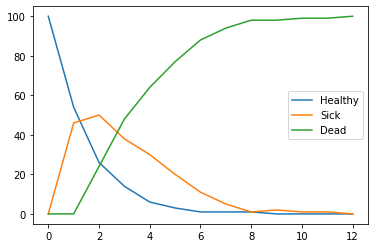

In [52]:
pyplot.plot(H,label = "Healthy")
pyplot.plot(S,label = "Sick")
pyplot.plot(D,label = "Dead")
pyplot.legend()

In [213]:
# notice anything about this plot? 


In [53]:
# lets increase the number of patients! 


In [54]:
some_patients = gen_patients(n=1000)

H,S,D = markov_model(some_patients,p)

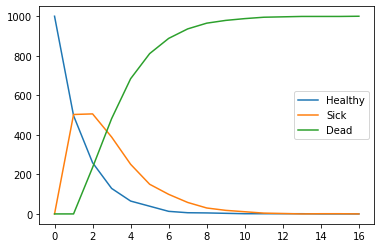

In [55]:
pyplot.plot(H,label = "Healthy")
pyplot.plot(S,label = "Sick")
pyplot.plot(D,label = "Dead")
pyplot.legend()

In [56]:
# lets do a series of simulations! 

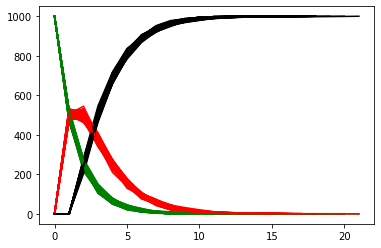

In [57]:
for i in range(0,100):
    some_patients = gen_patients(n=1000)
    H,S,D = markov_model(some_patients,p)
    pyplot.plot(H,color = "green")
    pyplot.plot(S,color = "red")
    pyplot.plot(D,color = "black")


In [58]:
p["H"]["S"] = 0.05
p["H"]["H"] = 1 - 0.05

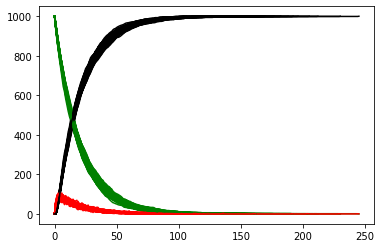

In [59]:
for i in range(0,100):
    some_patients = gen_patients(n=1000)
    H,S,D = markov_model(some_patients,p)
    pyplot.plot(H,color = "green")
    pyplot.plot(S,color = "red")
    pyplot.plot(D,color = "black")


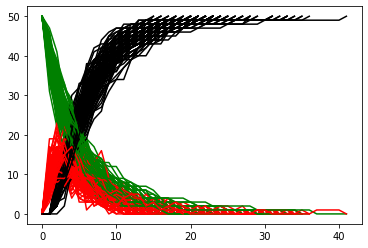

In [60]:
p["H"]["S"] = 0.20
p["H"]["H"] = 1 - 0.20
for i in range(0,100):
    some_patients = gen_patients(n=50)
    H,S,D = markov_model(some_patients,p)
    pyplot.plot(H,color = "green")
    pyplot.plot(S,color = "red")
    pyplot.plot(D,color = "black")


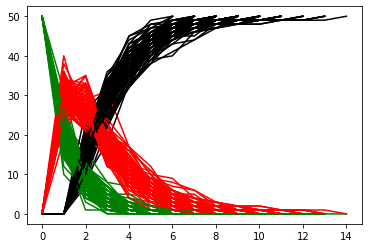

In [61]:
p["H"]["S"] = 0.60
p["H"]["H"] = 1 - 0.60
for i in range(0,100):
    some_patients = gen_patients(n=50)
    H,S,D = markov_model(some_patients,p)
    pyplot.plot(H,color = "green")
    pyplot.plot(S,color = "red")
    pyplot.plot(D,color = "black")


In [62]:
p

{'H': {'S': 0.6, 'D': 0.0, 'H': 0.4},
 'S': {'S': 0.5, 'D': 0.5, 'H': 0.0},
 'D': {'S': 0.0, 'D': 1.0, 'H': 0.0}}

In [63]:
p["H"]["S"] = 0.10
p["H"]["H"] = 1 - 0.10

p["S"]["H"] = 0.25/((0.50+0.50 +0.25))
p["S"]["S"] = 0.5/(0.50+0.50 +0.25)
p["S"]["D"] = 0.5/(0.50+0.50 +0.25)




In [64]:
p

{'H': {'S': 0.1, 'D': 0.0, 'H': 0.9},
 'S': {'S': 0.4, 'D': 0.4, 'H': 0.2},
 'D': {'S': 0.0, 'D': 1.0, 'H': 0.0}}

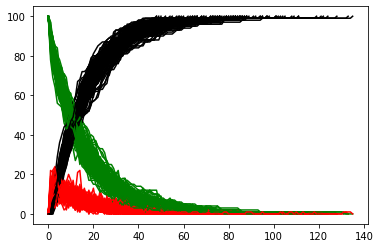

In [65]:

for i in range(0,100):
    some_patients = gen_patients(n=100)
    H,S,D = markov_model(some_patients,p)
    pyplot.plot(H,color = "green")
    pyplot.plot(S,color = "red")
    pyplot.plot(D,color = "black")


In [70]:
p["H"]["S"] = 0.10
p["H"]["H"] = 1 - 0.10

p["S"]["H"] = 5/((0.50+0.50 +5))
p["S"]["S"] = 0.5/(0.50+0.50 +5)
p["S"]["D"] = 0.5/(0.50+0.50 +5)




In [72]:
p

{'H': {'S': 0.1, 'D': 0.0, 'H': 0.9},
 'S': {'S': 0.08333333333333333,
  'D': 0.08333333333333333,
  'H': 0.8333333333333334},
 'D': {'S': 0.0, 'D': 1.0, 'H': 0.0}}

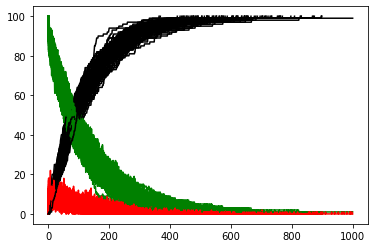

In [73]:

for i in range(0,100):
    some_patients = gen_patients(n=100)
    H,S,D = markov_model(some_patients,p)
    pyplot.plot(H,color = "green")
    pyplot.plot(S,color = "red")
    pyplot.plot(D,color = "black")
